In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Install required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
from collections import Counter

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load the dataset directly from GitHub
url = "https://raw.githubusercontent.com/Kimola/nlp-datasets/main/amazon-product-reviews/Apple%20AirTag%20(Technology)%20-%20Amazon%20Product%20Reviews.csv"
df = pd.read_csv(url)
print(f"Dataset loaded with {len(df)} reviews")

# Display first 5 rows
df.head()

Dataset loaded with 99 reviews


,Date,Comments
0,"March 17, 2025",As someone who frequently misplaces keys and b...
1,"March 17, 2025","I recently purchased the AirTag, and I must sa..."
2,"March 17, 2025",I'm absolutely loving my Apple AirTag. This de...
3,"March 17, 2025",I’ve been using the Apple AirTag for a few wee...
4,"March 17, 2025",These are great to keep track of items that yo...


In [4]:
# Initialize tools
## NLTK
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

## SpaCy
nlp = spacy.load("en_core_web_sm")


In [5]:
def process_with_nltk(text):
    tokens = word_tokenize(text.lower())
    filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
    stems = [stemmer.stem(w) for w in filtered]
    lemmas = [lemmatizer.lemmatize(w) for w in filtered]
    return filtered, stems, lemmas

def process_with_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    lemmas = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens, lemmas

In [6]:
# Sample 100 reviews for demonstration
texts = df['Comments'].sample(n=100, replace=True, random_state=42).tolist()


In [7]:
# Process first 3 reviews with both tools
print("\n=== Example Processing ===")
for i, text in enumerate(texts[:3]):
    print(f"\nReview {i+1}: {text[:50]}...")

    # NLTK
    nltk_tokens, nltk_stems, nltk_lemmas = process_with_nltk(text)
    print(f"NLTK | Tokens: {nltk_tokens[:5]}...")
    print(f"NLTK | Stems: {nltk_stems[:5]}...")
    print(f"NLTK | Lemmas: {nltk_lemmas[:5]}...")

    # SpaCy
    spacy_tokens, spacy_lemmas = process_with_spacy(text)
    print(f"Spacy| Tokens: {spacy_tokens[:5]}...")
    print(f"Spacy| Lemmas: {spacy_lemmas[:5]}...")




=== Example Processing ===

Review 1: We bought this for our grandson as a gift for Chri...
NLTK | Tokens: ['bought', 'grandson', 'gift', 'christmas', 'thrilled']...
NLTK | Stems: ['bought', 'grandson', 'gift', 'christma', 'thrill']...
NLTK | Lemmas: ['bought', 'grandson', 'gift', 'christmas', 'thrilled']...
Spacy| Tokens: ['bought', 'grandson', 'gift', 'christmas', 'thrilled']...
Spacy| Lemmas: ['buy', 'grandson', 'gift', 'christmas', 'thrill']...

Review 2: First one was not delivered in box as it should ha...
NLTK | Tokens: ['first', 'one', 'delivered', 'box', 'replaced']...
NLTK | Stems: ['first', 'one', 'deliv', 'box', 'replac']...
NLTK | Lemmas: ['first', 'one', 'delivered', 'box', 'replaced']...
Spacy| Tokens: ['delivered', 'box', 'replaced', 'great']...
Spacy| Lemmas: ['deliver', 'box', 'replace', 'great']...

Review 3: I bought this for my cat’s collar to keep track of...
NLTK | Tokens: ['bought', 'cat', 'collar', 'keep', 'track']...
NLTK | Stems: ['bought', 'cat', 'collar', 

In [8]:
# Batch process all samples
nltk_results = {'tokens': [], 'stems': [], 'lemmas': []}
spacy_results = {'tokens': [], 'lemmas': []}

for text in texts:
    # NLTK
    tokens, stems, lemmas = process_with_nltk(text)
    nltk_results['tokens'].extend(tokens)
    nltk_results['stems'].extend(stems)
    nltk_results['lemmas'].extend(lemmas)

    # SpaCy
    tokens, lemmas = process_with_spacy(text)
    spacy_results['tokens'].extend(tokens)
    spacy_results['lemmas'].extend(lemmas)


=== NLTK Results ===


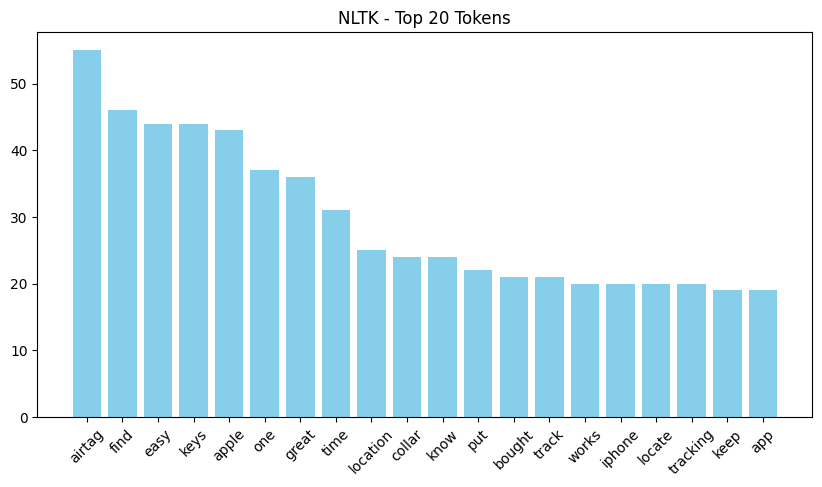

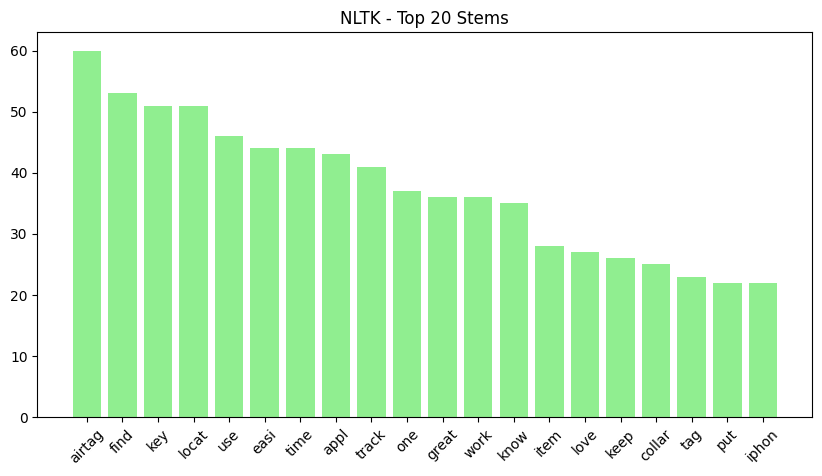

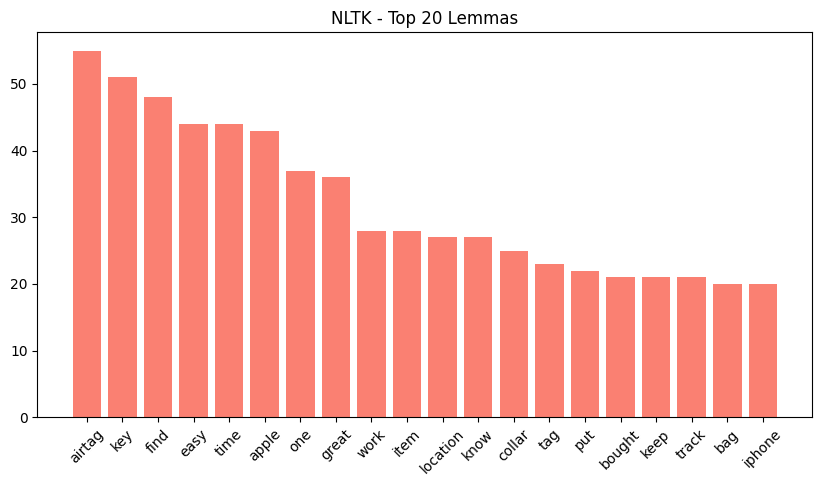


=== SpaCy Results ===


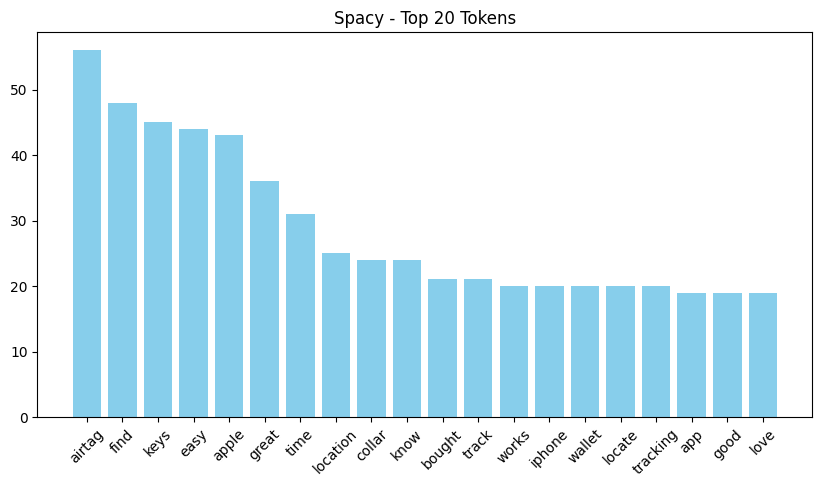

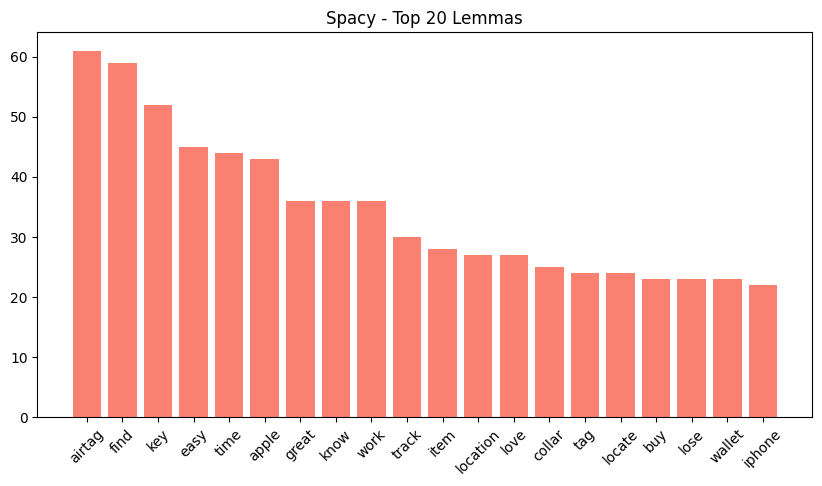

In [9]:
# Visualization
def plot_top_terms(counter, title, color='skyblue',filename=None):
    top_20 = counter.most_common(20)
    terms, counts = zip(*top_20)
    plt.figure(figsize=(10,5))
    plt.bar(terms, counts, color=color)
    plt.title(title)
    plt.xticks(rotation=45)
    # Save the plot if a filename is provided
    if filename:
        os.makedirs("plots", exist_ok=True)  # Save to a folder called 'plots'
        plt.savefig(f"plots/{filename}.png", bbox_inches='tight')
    plt.show()

print("\n=== NLTK Results ===")
plot_top_terms(Counter(nltk_results['tokens']), "NLTK - Top 20 Tokens", filename="nltk_tokens")
plot_top_terms(Counter(nltk_results['stems']), "NLTK - Top 20 Stems", 'lightgreen', filename="nltk_stems")
plot_top_terms(Counter(nltk_results['lemmas']), "NLTK - Top 20 Lemmas", 'salmon', filename="nltk_lemmas")

print("\n=== SpaCy Results ===")
plot_top_terms(Counter(spacy_results['tokens']), "Spacy - Top 20 Tokens", filename="spacy_tokens")
plot_top_terms(Counter(spacy_results['lemmas']), "Spacy - Top 20 Lemmas", 'salmon', filename="spacy_lemmas")

